# Exercise Week 8:Clustering

Import library yang dibutuhkan

In [351]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
import statistics
from sklearn.cluster import AgglomerativeClustering

In [352]:
#import dataset
url = 'https://raw.githubusercontent.com/ShvrCol/Week8/main/Property%20Dataset%20-%20Clustering%20-%20Data%20Rumah.csv'
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [353]:
#drop row 0
df.drop(0, axis = 0, inplace = True)
df.isna().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [354]:
#fill missing value in columns
df_new = df.interpolate(method = 'linear')
df_new.isna().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 0
Tingkat/Lantai                     0
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [355]:
#fill missing value in columns
df_new['Arah Hadap Rumah'].fillna(value = 'Utara', inplace = True)
df_new = df_new[df_new['Harga Penawaran (dari Owner)'] != " "]

In [356]:
#check missing value
df_new.isna().any()

Area Category                    False
Nama Daerah                      False
Luas Tanah (m2)                  False
Luas Bangunan (m2)               False
Jumlah Kamar                     False
Jumlah Kamar Mandi               False
Tingkat/Lantai                   False
Harga Penawaran (dari Owner)     False
Terjual/Belum                    False
Arah Hadap Rumah                 False
Posisi Rumah                      True
Lebar Jalan Depan Rumah (ROW)     True
dtype: bool

In [357]:
#convert float or str to int
df_new['Luas Tanah (m2)'] = df_new['Luas Tanah (m2)'].astype(int)
df_new['Jumlah Kamar'] = df_new['Jumlah Kamar'].astype(int)
df_new['Jumlah Kamar Mandi'] = df_new['Jumlah Kamar Mandi'].astype(int)
df_new['Tingkat/Lantai '] = df_new['Tingkat/Lantai '].astype(int)
df_new['Luas Bangunan (m2)'] = df_new['Luas Bangunan (m2)'].astype(int)
df_new['Harga Penawaran (dari Owner)'] = pd.to_numeric(df_new['Harga Penawaran (dari Owner)'])

In [358]:
#Label Encoder
le = LabelEncoder()
df_new['Area Category'] = le.fit_transform(df_new['Area Category'])
df_new['Nama Daerah'] = le.fit_transform(df_new['Nama Daerah'])
df_new['Luas Bangunan (m2)'] = le.fit_transform(df_new['Luas Bangunan (m2)'])
df_new['Terjual/Belum'] = le.fit_transform(df_new['Terjual/Belum'])
df_new['Arah Hadap Rumah'] = le.fit_transform(df_new['Arah Hadap Rumah'])
df_new['Posisi Rumah'] = le.fit_transform(df_new['Posisi Rumah'])
df_new['Lebar Jalan Depan Rumah (ROW)'] = le.fit_transform(df_new['Lebar Jalan Depan Rumah (ROW)'])

In [359]:
#scaling
sd_scaler = StandardScaler()
df_scale = sd_scaler.fit_transform(df_new.to_numpy())
df_scale = pd.DataFrame(df_scale, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
df_scale.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,-1.671343,1.044023,-0.974919,-1.476166,-1.381932,-1.430674,0.314847,-0.566622,0.0,0.840004,-0.828763,-0.164754
1,1.010987,-0.368844,-0.282302,-0.284406,0.440789,0.411344,0.314847,-0.276647,0.0,-1.137237,-2.210789,-1.033974
2,0.116877,-0.368844,-0.198198,0.311474,0.440789,1.025350,0.314847,-0.228562,0.0,0.840004,-0.828763,-1.033974
3,-0.777233,-0.368844,0.608207,1.473440,0.440789,1.025350,0.314847,-0.000159,0.0,-2.125857,-0.828763,-1.033974
4,-0.777233,-0.368844,1.102934,1.384058,0.440789,1.639356,0.314847,0.697071,0.0,0.840004,-0.828763,-1.033974


In [360]:
# set the parameter for evaluating K
SSE = []
# check the inertia for each K
K = range(1,11)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_new)
 SSE.append(kmeans.inertia_)

C:\Users\Erikson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


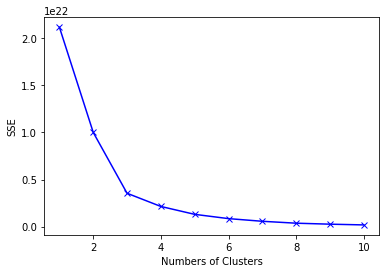

In [361]:
#display elbow knee
plt.plot(K, SSE,'bx-')
plt.xlabel('Numbers of Clusters') 
plt.ylabel('SSE') 
plt.show()

In [362]:
#Summarize the Analysis Result
k = KneeLocator(range(1,11), SSE, curve='convex', direction='decreasing')
print('Elbow/Knee: ', k.elbow)

Elbow/Knee:  3


In [363]:
#Clustering Model K-Means
kmeans = KMeans(n_clusters=5, random_state = 0, init = 'random', max_iter=100)
y_kmeans = kmeans.fit_predict(df_scale)
y_kmeans
df_new['K Means'] = y_kmeans

In [364]:
df_new.groupby('K Means').agg(
area_category = ('Area Category', pd.Series.mode), 
nama_daerah = ('Nama Daerah', pd.Series.mode),
luas_tanah = ('Luas Tanah (m2)', pd.Series.mean),
luas_bangunan = ('Luas Bangunan (m2)', pd.Series.mean),
jumlah_kamar = ('Jumlah Kamar', pd.Series.mean),
jumlah_kamar_mandi = ('Jumlah Kamar Mandi', pd.Series.mean),
tingkat_lantai = ('Tingkat/Lantai ', pd.Series.mean), 
harga_penawaran = ('Harga Penawaran (dari Owner)', pd.Series.mean), 
terjual_belum = ('Terjual/Belum', pd.Series.mode), 
arah_hadapan_rumah = ('Arah Hadap Rumah', pd.Series.mode), 
posisi_rumah = ('Posisi Rumah', pd.Series.mode), 
lebar_jalan_depan_rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mean), Count = ('K Means', 'count')
)

,area_category,nama_daerah,luas_tanah,luas_bangunan,jumlah_kamar,jumlah_kamar_mandi,tingkat_lantai,harga_penawaran,terjual_belum,arah_hadapan_rumah,posisi_rumah,lebar_jalan_depan_rumah,Count
K Means,,,,,,,,,,,,,
0,3,11,131.058824,32.823529,3.196078,2.254902,1.450980,1.839275e+09,0,1,5,2.117647,51
1,3,30,84.870968,22.951613,2.564516,1.693548,1.612903,1.211806e+09,0,3,2,0.387097,62
2,1,11,252.151515,78.484848,4.954545,4.181818,2.015152,4.684742e+09,0,3,5,2.272727,66
3,3,73,183.477273,64.522727,4.704545,3.625000,2.056818,3.244681e+09,0,3,2,0.318182,88
4,2,"[11, 28]",634.538462,109.384615,6.282051,5.230769,1.923077,1.966013e+10,0,3,"[2, 5]",1.384615,39


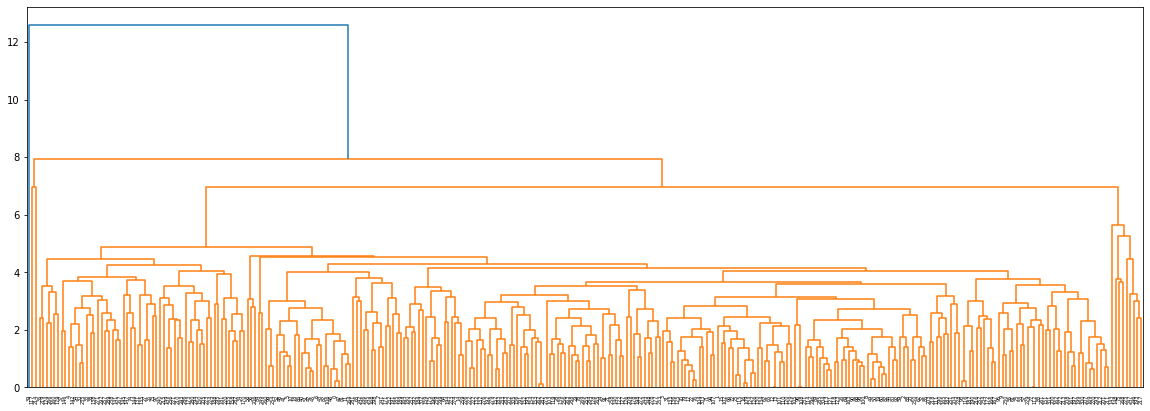

In [365]:
#display with the Dendogram for each Linkage
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scale, method='average', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

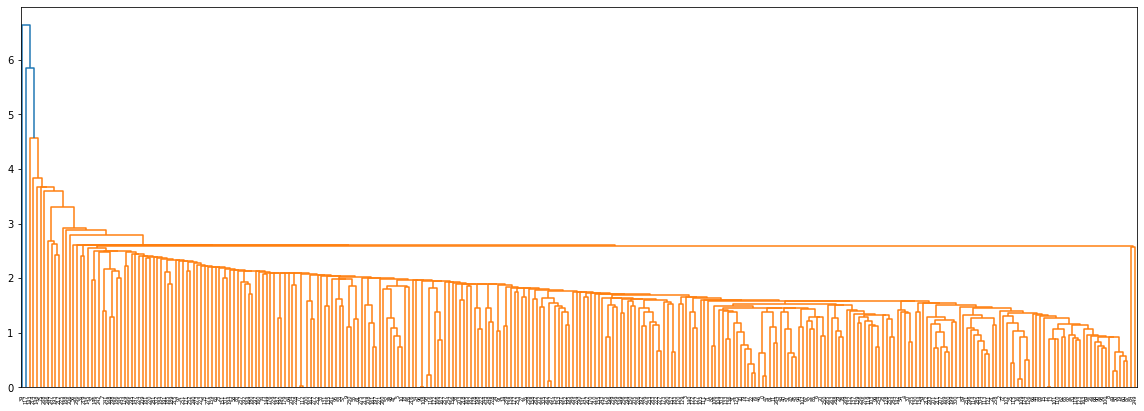

In [366]:
#display with the Dendogram for each Linkage
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scale, method='single', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

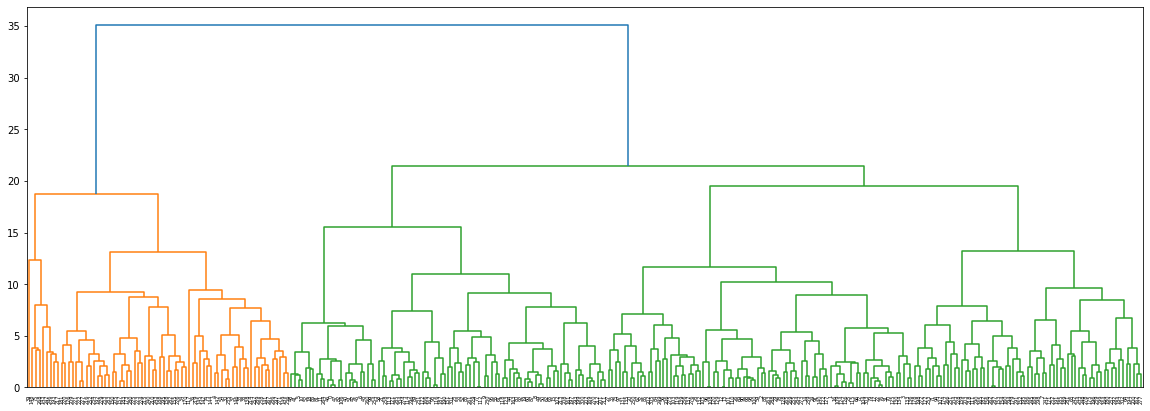

In [367]:
#display with the Dendogram for each Linkage
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scale, method='ward', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

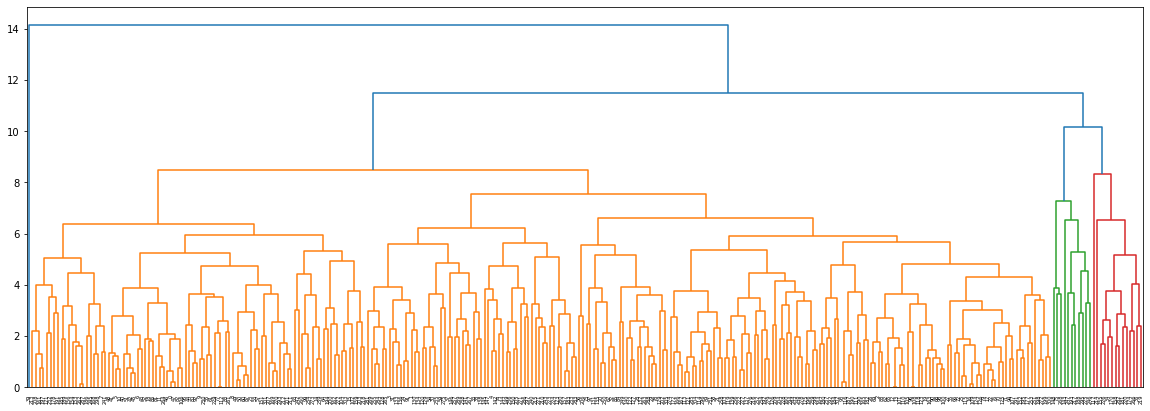

In [368]:
#display with the Dendogram for each Linkage
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scale, method='complete', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

In [371]:
#Clustering Model Hierarchical
hc_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
hc_model.fit_predict(df_scale)
labels = hc_model.labels_
labels
df_new['K Means'] = labels

In [372]:
df_new.groupby('K Means').agg(
area_category = ('Area Category', pd.Series.mode), 
nama_daerah = ('Nama Daerah', pd.Series.mode),
luas_tanah = ('Luas Tanah (m2)', pd.Series.mean),
luas_bangunan = ('Luas Bangunan (m2)', pd.Series.mean),
jumlah_kamar = ('Jumlah Kamar', pd.Series.mean),
jumlah_kamar_mandi = ('Jumlah Kamar Mandi', pd.Series.mean),
tingkat_lantai = ('Tingkat/Lantai ', pd.Series.mean), 
harga_penawaran = ('Harga Penawaran (dari Owner)', pd.Series.mean), 
terjual_belum = ('Terjual/Belum', pd.Series.mode), 
arah_hadapan_rumah = ('Arah Hadap Rumah', pd.Series.mode), 
posisi_rumah = ('Posisi Rumah', pd.Series.mode), 
lebar_jalan_depan_rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mean), Count = ('K Means', 'count')
)

,area_category,nama_daerah,luas_tanah,luas_bangunan,jumlah_kamar,jumlah_kamar_mandi,tingkat_lantai,harga_penawaran,terjual_belum,arah_hadapan_rumah,posisi_rumah,lebar_jalan_depan_rumah,Count
K Means,,,,,,,,,,,,,
0,3,11,221.386139,59.09571,4.234323,3.280528,1.844884,4.668828e+09,0,3,2,1.184818,303
1,2,50,1561.000000,117.00000,5.000000,7.000000,1.000000,1.400000e+10,0,3,2,3.000000,1
2,3,42,240.000000,89.00000,13.000000,13.000000,2.000000,2.750000e+09,0,1,2,2.000000,1
3,3,30,600.000000,109.00000,7.000000,5.000000,1.000000,9.900000e+10,0,0,2,0.000000,1
